In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import logistic_regression as lr
import seaborn as sns

In [2]:
g = pd.read_csv('../input/g_train.csv', index_col=(0,1))
e = pd.read_csv('../input/expression.short.csv', index_col=(0,1))
train = pd.concat([g,e["median"]], axis = 1)

In [559]:
n1 = pd.read_csv("../src_output/9.13.16.tissuesphysiologicalgroups4/n1.csv", index_col=(0,1))
n2 = pd.read_csv("../src_output/9.13.16.tissuesphysiologicalgroups4/n2.csv", index_col=(0,1))

In [564]:
n1_revised = n1[n1["tissue"] != 'digestive']
n2_revised = n2[n2["tissue"] != 'digestive']

In [569]:
n1[n1["tissue"] == 'epithelial_fats'].head()

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue,posterior_genome_only,posterior_genome_only_shared
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-WFON,ENSG00000001561.6,1,1.118431,0.634587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350203,...,0.0,0.0,0.0,0.0,0.781406,0.0,0.008485,epithelial_fats,0.041938,0.017337
GTEX-PWOO,ENSG00000002016.12,1,1.131251,0.572087,0.557545,0.560688,0.578286,0.977972,0.866232,0.726659,1.446151,...,0.0,0.0,0.0,0.0,0.670678,0.0,0.008837,epithelial_fats,0.046199,0.021629
GTEX-R55C,ENSG00000002016.12,1,1.208174,0.592920,0.554416,0.560688,0.577863,0.990879,0.865277,0.725208,1.433347,...,0.0,0.0,0.0,0.0,1.056888,0.0,0.010526,epithelial_fats,0.043866,0.019808
GTEX-RWS6,ENSG00000002016.12,1,1.554328,1.051253,0.557098,0.559807,0.577017,0.992084,0.836625,0.701108,1.854255,...,0.0,0.0,0.0,0.0,0.357520,0.0,0.018867,epithelial_fats,0.064237,0.042323
GTEX-PWCY,ENSG00000002746.10,1,1.554328,0.926254,0.995978,0.996478,0.898907,0.995439,0.829771,0.694416,1.880187,...,0.0,0.0,0.0,0.0,1.132251,0.0,0.010636,epithelial_fats,0.051796,0.026507


In [612]:
#labels = n2[n2["tissue"] == 'digestive']["expr_label"]
#posterior = n1[n1["tissue"] == 'digestive']["posterior_genome_only"]
labels = n2["expr_label"]
posterior = n1["posterior"]
sklearn.metrics.roc_auc_score(labels, posterior)

0.56728273331407353

In [587]:
labels = n2[n2["tissue"] == 'brain']["expr_label"]
posterior = n1[n1["tissue"] == 'brain']["posterior_genome_only"]
sklearn.metrics.roc_auc_score(labels, posterior)

0.57635294117647062

In [574]:
sklearn.metrics.roc_auc_score(n2[n2["tissue"] != 'digestive']["expr_label"], n1[n1["tissue"] != 'digestive']["posterior_genome_only"])

0.53512318259836933

In [609]:
labels = n2[n2["tissue"] == 'digestive']["expr_label"]
posterior = n1[n1["tissue"] == 'digestive']["posterior"]
sklearn.metrics.roc_auc_score(labels, posterior)

0.51549732318963093

In [613]:
np.savetxt('./brain_cortex_labels_20.txt', labels)
np.savetxt('./brain_cortex.scores_20.txt', posterior)

In [344]:
# add discrete training labels
train["labels"] = sklearn.preprocessing.binarize(np.abs(train["median"].values).reshape(-1,1), threshold = 1.5).reshape(-1,1)

In [3]:
##### processing data helper functions #####
def processTissueGroups(tissue_groups_path):
    tissue_groups = {}
    f = open(tissue_groups_path)
    for l in f:
        w = l.strip().split(',')
        group = w[0]
        tissue_groups[group] = []
        for tissue in w[1:]: tissue_groups[group].append(tissue)
    return tissue_groups    
    

def generateTrainTest(train, annotation_columns):
    '''
        Training data contains annotation columns and other data columns
        annotation_columns is a list of genomic annotations
    '''
    annotation_columns.insert(0, 'gene_id')
    train.insert(0, 'gene_id', train.index.get_level_values('gene_id'))
    train.index = train.index.get_level_values('subject_id')

    # boolean mask - mark True for all duplicates and original
    duplicates_bool = train.duplicated(subset = annotation_columns, keep = False)
    # isolate training data w/ no duplicates - complement of boolean mask
    train_nodups = train[~duplicates_bool]
    train_nodups.index = [train_nodups.index, train_nodups['gene_id']]
    train_nodups = train_nodups.drop('gene_id', axis=1)

    # order duplicates consecutively
    duplicates = train[duplicates_bool].sort_values(by = annotation_columns)
    # remove odd duplicates
    duplicates = duplicates.groupby(by = annotation_columns).filter(lambda x: len(x) % 2 == 0)
    duplicates.index = [duplicates.index, duplicates['gene_id']]
    duplicates = duplicates.drop('gene_id', axis=1)
    n1 = duplicates.iloc[::2]
    n2 = duplicates.iloc[1::2]
    return train_nodups, n1, n2

In [520]:
# split train/test and create relevant matrices
expression_path = '../input/expression.short.csv'
annotations_path = '../input/g_train.csv'
#tissue_groups_path = '../tissue_groups/tissue_groups.physiological.txt'
tissue_groups_path = '../tissue_groups/local_groups.txt'

train_list, test_list = [], []
#tissues = []
annotations = pd.read_csv(annotations_path, index_col=(0,1))
expression = pd.read_csv(expression_path, index_col=(0,1)) 

tissue_groups = processTissueGroups(tissue_groups_path)
#for k,v in tissue_groups.items():
#    tissues.extend(v)
annot_cols_original = list(annotations.columns)
annot_cols_original.insert(0, 'intercept')
# scale annotations and add intercept
annotations = annotations / (annotations.max() - annotations.min())
annotation_columns = list(annotations.columns)

print ("processed all data...")

#genomeonly_sharedtissue_beta = trainSharedGenomeOnlyModel(annotations, expression)

#for group in tissue_groups:
for tissue in tissues:
    # identify tissue-specific expression data
    '''
    expr_group = expression[tissue_groups[group]]
    # first, limit to samples you want and take median
    if len(expr_group.columns) == 2:
        expr_group = expr_group.dropna()
    elif len(expr_group.columns) == 3:
        expr_group = expr_group.dropna(thresh = 2)
    elif len(expr_group.columns) == 4:
        expr_group = expr_group.dropna(thresh = 3)
    else:
        expr_group = expr_group.dropna(thresh = 3)

    # compute med(abs(z-score)) for each sample
    expr_group["expr_median"] = np.abs(expr_group).median(axis=1)
    '''
    expr_group["expr_median"] = np.abs(expression[tissue])
    
    # concatenate annotations with expression data
    train = pd.concat([annotations, expr_group["expr_median"]], axis = 1)
    #train = pd.concat([annotations, expr_group["expr_median"]], axis = 1)
    
    # drop samples with any missing annotations
    train = train.dropna()
    # add binarized expression label
    train["expr_label"] = sklearn.preprocessing.binarize(np.abs(train["expr_median"]).reshape(-1,1), threshold = 2.5)
    # add posterior
    train["posterior"] = 0
    train["tissue"] = str(group)

    train, n1, n2 = generateTrainTest(train, annotation_columns)
    # add intercept
    train.insert(0, 'intercept', 1)
    n1.insert(0, 'intercept', 1)
    n2.insert(0, 'intercept', 1)

    train_list.append(train)
    test_list.append([n1, n2])

    print ("processed ", tissue, " tissues.")

processed all data...
processed  Adipose_Subcutaneous  tissues.
processed  Adipose_Visceral_Omentum  tissues.
processed  Adrenal_Gland  tissues.
processed  Artery_Aorta  tissues.
processed  Artery_Coronary  tissues.
processed  Artery_Tibial  tissues.
processed  Brain_Anterior_cingulate_cortex_BA24  tissues.
processed  Brain_Caudate_basal_ganglia  tissues.
processed  Brain_Cerebellar_Hemisphere  tissues.
processed  Brain_Cerebellum  tissues.
processed  Brain_Cortex  tissues.
processed  Brain_Frontal_Cortex_BA9  tissues.
processed  Brain_Hippocampus  tissues.
processed  Brain_Hypothalamus  tissues.
processed  Brain_Nucleus_accumbens_basal_ganglia  tissues.
processed  Brain_Putamen_basal_ganglia  tissues.
processed  Breast_Mammary_Tissue  tissues.
processed  Cells_EBV-transformed_lymphocytes  tissues.
processed  Cells_Transformed_fibroblasts  tissues.
processed  Colon_Sigmoid  tissues.
processed  Colon_Transverse  tissues.
processed  Esophagus_Gastroesophageal_Junction  tissues.
processed

In [507]:
print(train_list[i]["tissue"].head(1).values[0])

muscles


In [548]:
train_list[0][annot_cols_original].head()

intercept  max_GC_10kb  max_CpG_10kb  \
subject_id gene_id                                                    
GTEX-N7MS  ENSG00000001561.6           1     1.015867      0.572087   
           ENSG00000003056.3           1     1.156892      0.592920   
           ENSG00000003402.15          1     1.451764      0.801254   
           ENSG00000004534.10          1     1.323559      0.676254   
           ENSG00000004700.11          1     1.169713      0.655420   

                               max_priPhCons_10kb  max_mamPhCons_10kb  \
subject_id gene_id                                                      
GTEX-N7MS  ENSG00000001561.6             0.556651            0.560247   
           ENSG00000003056.3             0.566036            0.563769   
           ENSG00000003402.15            0.553522            0.559807   
           ENSG00000004534.10            0.579444            0.584898   
           ENSG00000004700.11            0.581232            0.587099   

                               max_verPhCons_10kb  max_priPhyloP_10kb  \
subject_id gene_id                                                      
GTEX-N7MS  ENSG00000001561.6             0.578286            0.855699   
           ENSG00000003056.3             0.582093            0.903025   
           ENSG00000003402.15            0.577017            0.912318   
           ENSG00000004534.10            0.602396            0.953449   
           ENSG00000004700.11            0.607472            0.957493   

                               max_mamPhyloP_10kb  max_verPhyloP_10kb  \
subject_id gene_id                                                      
GTEX-N7MS  ENSG00000001561.6             0.799545            0.672983   
           ENSG00000003056.3             0.805725            0.676492   
           ENSG00000003402.15            0.797242            0.668350   
           ENSG00000004534.10            0.841063            0.704711   
           ENSG00000004700.11            0.843872            0.707425   

                               max_GerpN_10kb     ...       E113_EnhBiv  \
subject_id gene_id                                ...                     
GTEX-N7MS  ENSG00000001561.6         1.797529     ...               0.0   
           ENSG00000003056.3         1.769976     ...               0.0   
           ENSG00000003402.15        1.863979     ...               0.0   
           ENSG00000004534.10        1.350203     ...               0.0   
           ENSG00000004700.11        1.369328     ...               0.0   

                               E116_general_promoter  E116_general_enhancer  \
subject_id gene_id                                                            
GTEX-N7MS  ENSG00000001561.6                     0.0                    0.0   
           ENSG00000003056.3                     0.0                    0.0   
           ENSG00000003402.15                    1.0                    0.0   
           ENSG00000004534.10                    1.0                    0.0   
           ENSG00000004700.11                    0.0                    0.0   

                               E116_TssA  E116_TssAFlnk  E116_EnhG  E116_Enh  \
subject_id gene_id                                                             
GTEX-N7MS  ENSG00000001561.6         0.0            0.0        0.0       0.0   
           ENSG00000003056.3         0.0            0.0        0.0       0.0   
           ENSG00000003402.15        1.0            0.0        0.0       0.0   
           ENSG00000004534.10        1.0            1.0        0.0       0.0   
           ENSG00000004700.11        0.0            0.0        0.0       0.0   

                               E116_TssBiv  E116_BivFlnk  E116_EnhBiv  
subject_id gene_id                                                     
GTEX-N7MS  ENSG00000001561.6           0.0           0.0          0.0  
           ENSG00000003056.3           0.0           0.0          0.0  
           ENSG00000003402.15          0.0           0.0          0.

In [550]:
probas_list = []
labels_list = []
for i in range(len(tissues)):
    tissue = tissues[i]
    if tissue in top_tissues:
        print(tissue)
        G_train = train_list[i][annot_cols_original].values
        y_train = train_list[i]["expr_label"].values
        G_test = test_list[i][0][annot_cols_original].values
        y_test = test_list[i][1]["expr_label"].values
        beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 100)
        print("completed training.")
        #l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
        #l.fit(G_train, y_train)
        probas = lr.log_prob(G_test, beta)
        probas_list.append(probas)
        labels_list.append(y_test)
        print ("all features: ", sklearn.metrics.roc_auc_score(y_test, probas))

Adipose_Visceral_Omentum
Optimization terminated successfully.
         Current function value: 1671.066325
         Iterations: 117
         Function evaluations: 200
         Gradient evaluations: 200
completed training.
all features:  0.658536585366
Artery_Aorta
Optimization terminated successfully.
         Current function value: 5860.696895
         Iterations: 174
         Function evaluations: 257
         Gradient evaluations: 257
completed training.
all features:  0.515502798473
Cells_Transformed_fibroblasts
Optimization terminated successfully.
         Current function value: 6074.179080
         Iterations: 159
         Function evaluations: 254
         Gradient evaluations: 254
completed training.
all features:  0.492514124294
Colon_Transverse
Optimization terminated successfully.
         Current function value: 3623.296987
         Iterations: 148
         Function evaluations: 228
         Gradient evaluations: 228
completed training.
all features:  0.523544800523
Eso

In [558]:
np.savetxt('./brain_cortex_labels_20.txt', labels_list[7])
np.savetxt('./brain_cortex.scores_20.txt', probas_list[7])

In [542]:
corrs = []
pvalues = []
top_tissues = []

In [544]:
top_tissues

['Adipose_Visceral_Omentum',
 'Artery_Aorta',
 'Cells_Transformed_fibroblasts',
 'Colon_Transverse',
 'Esophagus_Muscularis',
 'Liver',
 'Nerve_Tibial',
 'Stomach']

In [543]:
for i in range(len(train_list)):
    corr, pvalue = scipy.stats.kendalltau(test_list[i][0]["expr_label"].values, test_list[i][1]["expr_label"].values)
    if corr > 0.02:
        print(tissues[i])
        top_tissues.append(tissues[i])
        print("# of training samples: ", len(train_list[i]))
        print("# of n2 pairs: ", len(test_list[i][0]))
        corr, pvalue = scipy.stats.kendalltau(test_list[i][0]["expr_label"].values, test_list[i][1]["expr_label"].values)
        print("Kendall Tau correlation:", corr, pvalue)
        corrs.append(corr)
        pvalues.append(pvalue)

Adipose_Visceral_Omentum
# of training samples:  17651
# of n2 pairs:  166
Kendall Tau correlation: 0.342714644144 5.59393485336e-11
Artery_Aorta
# of training samples:  63085
# of n2 pairs:  2392
Kendall Tau correlation: 0.0714468976108 1.62622377527e-07
Cells_Transformed_fibroblasts
# of training samples:  65716
# of n2 pairs:  2887
Kendall Tau correlation: 0.0405369476595 0.00109407980202
Colon_Transverse
# of training samples:  39144
# of n2 pairs:  845
Kendall Tau correlation: 0.0789186832352 0.000594735323237
Esophagus_Muscularis
# of training samples:  57678
# of n2 pairs:  2069
Kendall Tau correlation: 0.0602808045444 3.96608575041e-05
Liver
# of training samples:  19016
# of n2 pairs:  196
Kendall Tau correlation: 0.27592937112 9.29015345533e-09
Nerve_Tibial
# of training samples:  70418
# of n2 pairs:  3028
Kendall Tau correlation: 0.0382601060757 0.00159839603735
Stomach
# of training samples:  40172
# of n2 pairs:  910
Kendall Tau correlation: 0.129875825342 4.47754657357e-

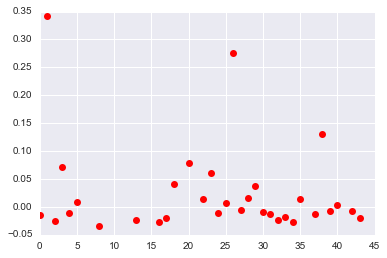

In [539]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
plt.plot(corrs, 'ro')

In [500]:
train_list[3]["tissue"].head(), test_list[3][0]["tissue"].head()

(subject_id  gene_id           
 GTEX-N7MS   ENSG00000001561.6     muscles
             ENSG00000003056.3     muscles
             ENSG00000003402.15    muscles
             ENSG00000004534.10    muscles
             ENSG00000004779.5     muscles
 Name: tissue, dtype: object, subject_id  gene_id           
 GTEX-RNOR   ENSG00000001561.6     muscles
 GTEX-RWS6   ENSG00000002016.12    muscles
 GTEX-R55C   ENSG00000003056.3     muscles
 GTEX-OXRK   ENSG00000003249.9     muscles
 GTEX-WFON   ENSG00000003249.9     muscles
 Name: tissue, dtype: object)

In [462]:
n1.tail()

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_TssAFlnk,E116_EnhG,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-WYJK,ENSG00000267605.1,1,1.349200,0.801254,0.553522,0.559807,0.577017,0.943983,0.834939,0.699516,1.350203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.875128,0.0,0,muscles
GTEX-WY7C,ENSG00000272690.1,1,1.310739,0.592920,0.602237,0.597224,0.615509,0.957149,0.871401,0.731760,1.493963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.297383,0.0,0,muscles
GTEX-XQ3S,ENSG00000272849.1,1,1.438944,0.717920,0.632181,1.000000,1.000000,0.970400,0.964606,0.834011,2.111953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.890710,0.0,0,muscles
GTEX-UPJH,ENSG00000273175.1,1,1.285098,0.676254,0.569612,0.575214,0.594783,0.969023,0.851007,0.713228,1.372407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.466875,0.0,0,muscles
GTEX-WFON,ENSG00000273476.1,1,1.503046,0.988754,0.997765,0.998679,0.998731,0.983479,0.827917,0.693994,1.849393,...,0.0,0.0,1.0,0.0,0.0,0.0,0.274273,0.0,0,muscles


In [463]:
n2.tail()

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_TssAFlnk,E116_EnhG,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-X8HC,ENSG00000267605.1,1,1.349200,0.801254,0.553522,0.559807,0.577017,0.943983,0.834939,0.699516,1.350203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.435803,0.0,0,muscles
GTEX-XBED,ENSG00000272690.1,1,1.310739,0.592920,0.602237,0.597224,0.615509,0.957149,0.871401,0.731760,1.493963,...,0.0,0.0,0.0,0.0,0.0,0.0,1.147107,0.0,0,muscles
GTEX-XUW1,ENSG00000272849.1,1,1.438944,0.717920,0.632181,1.000000,1.000000,0.970400,0.964606,0.834011,2.111953,...,1.0,0.0,0.0,0.0,0.0,0.0,1.214071,0.0,0,muscles
GTEX-WFON,ENSG00000273175.1,1,1.285098,0.676254,0.569612,0.575214,0.594783,0.969023,0.851007,0.713228,1.372407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.554478,0.0,0,muscles
GTEX-WY7C,ENSG00000273476.1,1,1.503046,0.988754,0.997765,0.998679,0.998731,0.983479,0.827917,0.693994,1.849393,...,0.0,0.0,1.0,0.0,0.0,0.0,0.348438,0.0,0,muscles


In [464]:
import scipy
from scipy import stats

In [483]:
test_list[0][0]

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_TssAFlnk,E116_EnhG,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-WFON,ENSG00000001561.6,1,1.118431,0.634587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.781406,0.0,0,epithelial_fats
GTEX-PWOO,ENSG00000002016.12,1,1.131251,0.572087,0.557545,0.560688,0.578286,0.977972,0.866232,0.726659,1.446151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.670678,0.0,0,epithelial_fats
GTEX-R55C,ENSG00000002016.12,1,1.208174,0.592920,0.554416,0.560688,0.577863,0.990879,0.865277,0.725208,1.433347,...,0.0,0.0,0.0,0.0,0.0,0.0,1.056888,0.0,0,epithelial_fats
GTEX-RWS6,ENSG00000002016.12,1,1.554328,1.051253,0.557098,0.559807,0.577017,0.992084,0.836625,0.701108,1.854255,...,1.0,0.0,0.0,0.0,0.0,0.0,0.357520,0.0,0,epithelial_fats
GTEX-PWCY,ENSG00000002746.10,1,1.554328,0.926254,0.995978,0.996478,0.898907,0.995439,0.829771,0.694416,1.880187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.132251,0.0,0,epithelial_fats
GTEX-OXRP,ENSG00000002933.3,1,1.387662,0.634587,0.559332,0.565090,0.582939,0.961021,0.845895,0.708969,1.375811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.839826,0.0,0,epithelial_fats
GTEX-R3RS,ENSG00000003056.3,1,1.246636,0.592920,0.555310,0.559807,0.577017,0.991912,0.840501,0.704758,1.779701,...,0.0,0.0,1.0,0.0,0.0,0.0,1.282774,0.0,0,epithelial_fats
GTEX-PSDG,ENSG00000003056.3,1,1.297918,0.676254,0.553522,0.559807,0.577440,0.885988,0.796343,0.668303,1.388291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.580879,0.0,0,epithelial_fats
GTEX-OXRK,ENSG00000003249.9,1,1.400482,0.655420,0.905252,0.627597,0.645540,0.969712,0.840276,0.704196,1.530106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.589584,0.0,0,epithelial_fats


In [472]:
scipy.stats.kendalltau(test_list[0][0]["expr_label"].values, test_list[0][1]["expr_label"].values)

KendalltauResult(correlation=0.060027170577100261, pvalue=2.8173561776481678e-14)

In [473]:
scipy.stats.kendalltau(test_list[1][0]["expr_label"].values, test_list[1][1]["expr_label"].values)

KendalltauResult(correlation=0.079682452306981413, pvalue=0.012022770233812364)

In [474]:
scipy.stats.kendalltau(test_list[2][0]["expr_label"].values, test_list[2][1]["expr_label"].values)

KendalltauResult(correlation=0.019006043190954839, pvalue=0.40108089140930303)

In [475]:
scipy.stats.kendalltau(test_list[3][0]["expr_label"].values, test_list[3][1]["expr_label"].values)

KendalltauResult(correlation=0.084420071985502942, pvalue=2.0308330837277285e-22)

In [494]:
test_list[2][0].head()

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_TssAFlnk,E116_EnhG,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-R55C,ENSG00000002016.12,1,1.208174,0.592920,0.554416,0.560688,0.577863,0.990879,0.865277,0.725208,1.433347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.885466,0.0,0,digestive
GTEX-OXRK,ENSG00000003249.9,1,1.400482,0.655420,0.905252,0.627597,0.645540,0.969712,0.840276,0.704196,1.530106,...,0.0,0.0,0.0,0.0,0.0,0.0,1.086193,0.0,0,digestive
GTEX-W5WG,ENSG00000003756.12,1,1.336380,0.738754,0.613410,0.618353,0.643002,0.960160,0.845333,0.708501,1.374352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.623308,0.0,0,digestive
GTEX-P4QT,ENSG00000004660.10,1,1.297918,0.655420,0.559332,0.566850,0.590130,0.991912,0.895615,0.771490,1.932051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.381617,0.0,0,digestive
GTEX-S4P3,ENSG00000006016.6,1,1.618431,1.009587,0.595980,1.000000,0.999577,0.869983,0.876513,0.722775,1.983914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.627297,0.0,0,digestive


In [487]:
len(train_list[1])

29021

In [488]:
len(train_list[3])

93256

In [477]:
test_list[2][0].head()

,,intercept,max_GC_10kb,max_CpG_10kb,max_priPhCons_10kb,max_mamPhCons_10kb,max_verPhCons_10kb,max_priPhyloP_10kb,max_mamPhyloP_10kb,max_verPhyloP_10kb,max_GerpN_10kb,...,E116_TssAFlnk,E116_EnhG,E116_Enh,E116_TssBiv,E116_BivFlnk,E116_EnhBiv,expr_median,expr_label,posterior,tissue
subject_id,gene_id,,,,,,,,,,,,,,,,,,,,,
GTEX-R55C,ENSG00000002016.12,1,1.208174,0.592920,0.554416,0.560688,0.577863,0.990879,0.865277,0.725208,1.433347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.885466,0.0,0,digestive
GTEX-OXRK,ENSG00000003249.9,1,1.400482,0.655420,0.905252,0.627597,0.645540,0.969712,0.840276,0.704196,1.530106,...,0.0,0.0,0.0,0.0,0.0,0.0,1.086193,0.0,0,digestive
GTEX-W5WG,ENSG00000003756.12,1,1.336380,0.738754,0.613410,0.618353,0.643002,0.960160,0.845333,0.708501,1.374352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.623308,0.0,0,digestive
GTEX-P4QT,ENSG00000004660.10,1,1.297918,0.655420,0.559332,0.566850,0.590130,0.991912,0.895615,0.771490,1.932051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.381617,0.0,0,digestive
GTEX-S4P3,ENSG00000006016.6,1,1.618431,1.009587,0.595980,1.000000,0.999577,0.869983,0.876513,0.722775,1.983914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.627297,0.0,0,digestive


In [479]:
len(train_list[2])

38190

In [467]:
len(train)

16615

In [347]:
expression.columns

Index(['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland',
       'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial',
       'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia',
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
       'Breast_Mammary_Tissue', 'Cells_EBV-transformed_lymphocytes',
       'Cells_Transformed_fibroblasts', 'Colon_Sigmoid', 'Colon_Transverse',
       'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa',
       'Esophagus_Muscularis', 'Heart_Atrial_Appendage',
       'Heart_Left_Ventricle', 'Liver', 'Lung', 'Muscle_Skeletal',
       'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
       'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg',
       'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach', 'Testis',
       

In [350]:
tissues = list(expression.columns)[:-1]

In [415]:
tissue_groups = [['Brain_Frontal_Cortex_BA9','Brain_Cortex','Brain_Anterior_cingulate_cortex_BA24'],
                 ['Brain_Nucleus_accumbens_basal_ganglia','Brain_Putamen_basal_ganglia','Brain_Caudate_basal_ganglia'], 
                 ['Brain_Hypothalamus','Brain_Hippocampus'],
                 ['Heart_Atrial_Appendage','Heart_Left_Ventricle','Muscle_Skeletal'],
                 ['Artery_Tibial', 'Artery_Aorta', 'Nerve_Tibial'],
                 ['Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg'],
                 ['Lung', 'Thyroid'], ['Adipose_Visceral_Omentum', 'Adipose_Subcutaneous']]

In [425]:
tissues_all = list(itertools.chain.from_iterable(tissue_groups))

In [452]:
tissues = ['Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg']

In [453]:
#expr_group = expression
#expr_group = expression[tissue]
#expr_group = expr_group.dropna()
#expr_group = pd.DataFrame()
# compute med(abs(z-score)) for each sample
expr_group = expression[tissues]
expr_group = expr_group.dropna()
#expr_group = expr_group.dropna(thresh = 3)
expr_group["expr_median"] = np.abs(expr_group[tissues].median(axis=1))
#expr_group["expr_median"] = np.abs(expr_group[tissue])
# concatenate annotations with expression data
train = pd.concat([annotations, expr_group["expr_median"]], axis = 1)
# drop samples with any missing annotations
train = train.dropna()
# add binarized expression label
train["expr_label"] = sklearn.preprocessing.binarize(np.abs(train["expr_median"]).reshape(-1,1), threshold = 1.5)
# add posterior
train["posterior"] = 0
train["tissue"] = str(group)

train, n1, n2 = generateTrainTest(train, annotation_columns)
# add intercept
train.insert(0, 'intercept', 1)
n1.insert(0, 'intercept', 1)
n2.insert(0, 'intercept', 1)

G_train = train[annot_cols_original].values
G_train_general = train[general_features].values
y_train = train["expr_label"].values
G_test = n1[annot_cols_original].values
G_test_general = n1[general_features].values
y_test = n2["expr_label"].values

In [454]:
len(G_train), len(y_train)

(16615, 16615)

In [457]:
len(G_train[0])

363

In [459]:
beta = lr.sgd(train[annot_cols_original].values, train["expr_label"].values, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 1000)

Optimization terminated successfully.
         Current function value: 4369.962516
         Iterations: 162
         Function evaluations: 329
         Gradient evaluations: 329


In [443]:
beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 100)

Optimization terminated successfully.
         Current function value: 15245.211842
         Iterations: 212
         Function evaluations: 304
         Gradient evaluations: 304


In [444]:
beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 1000)

Optimization terminated successfully.
         Current function value: 15334.047309
         Iterations: 183
         Function evaluations: 359
         Gradient evaluations: 359


In [ ]:
beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 100)
#l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
#l.fit(G_train, y_train)
probas = lr.log_prob(G_test, beta)
probas_list.append(probas)
labels_list.append(y_test)
print(tissue)
print ("all features: ", sklearn.metrics.roc_auc_score(y_test, probas))

In [434]:
len(probas)

11612

In [432]:
np.savetxt("../input/shared_beta_20tissues.txt", beta, newline=' ')

In [417]:
probas_list, labels_list = [], []
all_features = annot_cols_original
general_features = all_features[0:121]
# compute AUC for each tissue individually with and without tissue-specific annotations
for tissue in tissue_groups:
    #expr_group = expression
    #expr_group = expression[tissue]
    #expr_group = expr_group.dropna()
    #expr_group = pd.DataFrame()
    # compute med(abs(z-score)) for each sample
    expr_group = expression
    expr_group["expr_median"] = np.abs(expr_group[tissue].median(axis=1))
    #expr_group["expr_median"] = np.abs(expr_group[tissue])
    # concatenate annotations with expression data
    train = pd.concat([annotations, expr_group["expr_median"]], axis = 1)
    # drop samples with any missing annotations
    train = train.dropna()
    # add binarized expression label
    train["expr_label"] = sklearn.preprocessing.binarize(np.abs(train["expr_median"]).reshape(-1,1), threshold = 1.5)
    # add posterior
    train["posterior"] = 0
    train["tissue"] = str(group)

    train, n1, n2 = generateTrainTest(train, annotation_columns)
    # add intercept
    train.insert(0, 'intercept', 1)
    n1.insert(0, 'intercept', 1)
    n2.insert(0, 'intercept', 1)
    
    G_train = train[annot_cols_original].values
    G_train_general = train[general_features].values
    y_train = train["expr_label"].values
    G_test = n1[annot_cols_original].values
    G_test_general = n1[general_features].values
    y_test = n2["expr_label"].values
    
    #beta = lr.sgd(G_train_list[ind], y_train_list[ind], np.ones(len(G_train_list[ind][0])), shared_beta, 10)
    #beta = lr.sgd(G_train[:,0:121], y_train, np.ones(len(G_train[0,0:121])), np.zeros(len(G_train[0,0:121])), 100)
    '''
    beta = lr.sgd(G_train_general, y_train, np.ones(len(G_train_general[0])), np.zeros(len(G_train_general[0])), 100)
    #l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
    #l.fit(G_train, y_train)
    probas = lr.log_prob(G_test_general, beta)
    probas_list.append(probas)
    labels_list.append(y_test)
    print(tissue)
    print ("general features only: ", sklearn.metrics.roc_auc_score(y_test, probas))
    '''
    beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 100)
    #l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
    #l.fit(G_train, y_train)
    probas = lr.log_prob(G_test, beta)
    probas_list.append(probas)
    labels_list.append(y_test)
    print(tissue)
    print ("all features: ", sklearn.metrics.roc_auc_score(y_test, probas))

Optimization terminated successfully.
         Current function value: 8416.170137
         Iterations: 180
         Function evaluations: 267
         Gradient evaluations: 267
['Brain_Frontal_Cortex_BA9', 'Brain_Cortex', 'Brain_Anterior_cingulate_cortex_BA24']
all features:  0.541381528923
Optimization terminated successfully.
         Current function value: 9235.443678
         Iterations: 193
         Function evaluations: 275
         Gradient evaluations: 275
['Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia', 'Brain_Caudate_basal_ganglia']
all features:  0.529986613119
Optimization terminated successfully.
         Current function value: 8637.923319
         Iterations: 168
         Function evaluations: 250
         Gradient evaluations: 250
['Brain_Hypothalamus', 'Brain_Hippocampus']
all features:  0.445223120695
Optimization terminated successfully.
         Current function value: 34036.015781
         Iterations: 269
         Function evaluations: 370

In [418]:
len(labels_list)

8

In [411]:
len(labels_list[1])

451

In [390]:
#tissues = ['Brain_Frontal_Cortex_BA9', 'Brain_Cortex', 'Brain_Anterior_cingulate_cortex_BA24']
#tissues = ['Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia', 'Brain_Caudate_basal_ganglia']
#tissues = ['Brain_Hypothalamus', 'Brain_Hippocampus']
#tissues = ['Heart_Atrial_Appendage','Heart_Left_Ventricle','Muscle_Skeletal']
#tissues = ['Artery_Tibial', 'Artery_Aorta', 'Nerve_Tibial']
#tissues = ['Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg']
tissues = ['Testis']
expr_group = expression[tissues]
expr_group = expr_group.dropna()
#expr_group = expression[tissue_groups["brain"]]
#expr_group = expression
# first, limit to samples you want and take median
'''
if len(expr_group.columns) == 2:
    expr_group = expr_group.dropna()
elif len(expr_group.columns) == 3:
    expr_group = expr_group.dropna(thresh = 2)
elif len(expr_group.columns) == 4:
    expr_group = expr_group.dropna(thresh = 3)
else:
    expr_group = expr_group.dropna(thresh = 3)
'''
# compute med(abs(z-score)) for each sample
expr_group["expr_median"] = np.abs(expr_group).median(axis=1)
# concatenate annotations with expression data
train = pd.concat([annotations, expr_group["expr_median"]], axis = 1)
# drop samples with any missing annotations
train = train.dropna()
# add binarized expression label
train["expr_label"] = sklearn.preprocessing.binarize(np.abs(train["expr_median"]).reshape(-1,1), threshold = 2.0)
# add posterior
train["posterior"] = 0
train["tissue"] = str(group)

train, n1, n2 = generateTrainTest(train, annotation_columns)
# add intercept
train.insert(0, 'intercept', 1)
n1.insert(0, 'intercept', 1)
n2.insert(0, 'intercept', 1)

#train_list.append(train)
#test_list.append([n1, n2])
train_list[11] = train
test_list[11] = [n1, n2]
print ("processed ", group, " tissues.")

processed  muscles  tissues.


In [299]:
len(train_list[11])

60987

In [296]:
len(test_list[11][0])

2193

In [78]:
x = np.append(y_test, y_train)

In [235]:
G_train_list, y_train_list, G_test_list, y_test_list = [], [], [], []
tissue_indices = [6, 4, 7, 8, 9, 10]
for ind in tissue_indices:
    G_train_list.append(train_list[ind][annot_cols_original].values)
    y_train_list.append(train_list[ind]["expr_label"].values)
    G_test_list.append(test_list[ind][0][annot_cols_original].values)
    y_test_list.append(test_list[ind][1]["expr_label"].values)

In [ ]:
G_train = np.append(G_train1, G_train2, axis=0)
G_train = np.append(G_train, G_train3, axis=0)
G_train = np.append(G_train, G_train4, axis=0)
G_train = np.append(G_train, G_train5, axis=0)
G_train = np.append(G_train, G_train6, axis=0)


G_test = np.append(G_test1, G_test2, axis=0)
G_test = np.append(G_test, G_test3, axis=0)
G_test = np.append(G_test, G_test4, axis=0)
G_test = np.append(G_test, G_test5, axis=0)
G_test = np.append(G_test, G_test6, axis=0)


y_train = np.append(y_train1, y_train2)
y_train = np.append(y_train, y_train3)
y_train = np.append(y_train, y_train4)
y_train = np.append(y_train, y_train5)
y_train = np.append(y_train, y_train6)


y_test = np.append(y_test1, y_test2)
y_test = np.append(y_test,y_test3)
y_test = np.append(y_test,y_test4)
y_test = np.append(y_test,y_test5)
y_test = np.append(y_test,y_test6)

In [391]:
G_train = train_list[11][annot_cols_original].values
y_train = train_list[11]["expr_label"].values
G_test = test_list[11][0][annot_cols_original].values
y_test = test_list[11][1]["expr_label"].values

In [295]:
len(y_test)

2193

In [287]:
y_test.shape

(2193,)

In [392]:
#beta = lr.sgd(G_train_list[ind], y_train_list[ind], np.ones(len(G_train_list[ind][0])), shared_beta, 10)
#beta = lr.sgd(G_train[:,0:121], y_train, np.ones(len(G_train[0,0:121])), np.zeros(len(G_train[0,0:121])), 100)
beta = lr.sgd(G_train, y_train, np.ones(len(G_train[0])), np.zeros(len(G_train[0])), 100)

print("completed training.")
#l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
#l.fit(G_train, y_train)
probas = lr.log_prob(G_test, beta)
probas_list.append(probas)
labels_list.append(y_test)

Optimization terminated successfully.
         Current function value: 23919.452449
         Iterations: 219
         Function evaluations: 307
         Gradient evaluations: 307
completed training.


In [388]:
len(y_test)

2193

In [281]:
labels_list, probas_list = [], []
for ind in range(len(tissue_indices)):
    #beta = lr.sgd(G_train_list[ind], y_train_list[ind], np.ones(len(G_train_list[ind][0])), shared_beta, 10)
    beta = lr.sgd(G_train_list[ind], y_train_list[ind], np.ones(len(G_train_list[ind][0])), np.zeros(len(G_train_list[ind][0])), 100)

    print("completed training.")
    #l = sklearn.linear_model.LogisticRegression(penalty='l2', tol=.0001, fit_intercept=True)
    #l.fit(G_train, y_train)
    probas = lr.log_prob(G_test_list[ind], beta)
    probas_list.append(probas)
    labels_list.append(y_test_list[ind])

Optimization terminated successfully.
         Current function value: 6652.002673
         Iterations: 168
         Function evaluations: 252
         Gradient evaluations: 252
completed training.
Optimization terminated successfully.
         Current function value: 7240.150341
         Iterations: 176
         Function evaluations: 258
         Gradient evaluations: 258
completed training.
Optimization terminated successfully.
         Current function value: 5349.207600
         Iterations: 166
         Function evaluations: 244
         Gradient evaluations: 244
completed training.


KeyboardInterrupt: 

In [435]:
#labels = list(itertools.chain.from_iterable(labels_list))
#probas = list(itertools.chain.from_iterable(probas_list))
print (sklearn.metrics.roc_auc_score(y_test, probas))
#print (sklearn.metrics.roc_auc_score(y_test, probas))

0.564750177127


In [414]:
len(labels_list)

3

In [259]:
import itertools
x = list(itertools.chain(labels_list))

In [438]:
'Skin_Sun_Exposed_Lower_Leg' in expression.columns

False

In [439]:
expression.columns

Index(['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland',
       'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial',
       'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia',
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
       'Breast_Mammary_Tissue', 'Cells_EBV-transformed_lymphocytes',
       'Cells_Transformed_fibroblasts', 'Colon_Sigmoid', 'Colon_Transverse',
       'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa',
       'Esophagus_Muscularis', 'Heart_Atrial_Appendage',
       'Heart_Left_Ventricle', 'Liver', 'Lung', 'Muscle_Skeletal',
       'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
       'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg',
       'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach', 'Testis',
       

In [271]:
list(itertools.chain.from_iterable(labels_list)).shape

AttributeError: 'list' object has no attribute 'shape'

In [244]:
x = [1,2,4]
y = [19,234,234]
z = [13,4324,345,34234]
sum([x,y,z],[])

[1, 2, 4, 19, 234, 234, 13, 4324, 345, 34234]

In [176]:
shared_beta = beta

In [437]:
np.savetxt('./brain_cortex_labels_20.txt', y_test)
np.savetxt('./brain_cortex.scores_20.txt', probas)

In [403]:
len(labels_list)

6

In [21]:
train_list[1].columns

Index(['intercept', 'max_GC_10kb', 'max_CpG_10kb', 'max_priPhCons_10kb',
       'max_mamPhCons_10kb', 'max_verPhCons_10kb', 'max_priPhyloP_10kb',
       'max_mamPhyloP_10kb', 'max_verPhyloP_10kb', 'max_GerpN_10kb',
       ...
       'E116_TssAFlnk', 'E116_EnhG', 'E116_Enh', 'E116_TssBiv', 'E116_BivFlnk',
       'E116_EnhBiv', 'expr_median', 'expr_label', 'posterior', 'tissue'],
      dtype='object', length=367)

In [12]:
train_list[1].columns

Index(['intercept', 'max_GC_10kb', 'max_CpG_10kb', 'max_priPhCons_10kb',
       'max_mamPhCons_10kb', 'max_verPhCons_10kb', 'max_priPhyloP_10kb',
       'max_mamPhyloP_10kb', 'max_verPhyloP_10kb', 'max_GerpN_10kb',
       ...
       'E116_TssAFlnk', 'E116_EnhG', 'E116_Enh', 'E116_TssBiv', 'E116_BivFlnk',
       'E116_EnhBiv', 'expr_median', 'expr_label', 'posterior', 'tissue'],
      dtype='object', length=367)

In [9]:
def bootstrap_resample(X, n=None):
    """ 
    citation: http://nbviewer.jupyter.org/gist/aflaxman/6871948
    Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X.iloc[resample_i]
    return X_resample

In [ ]:
def estimateBeta(beta):
    for i in range(self.num_tissues):
        self.beta_children[i] = lr.sgd(self.train_list[i][self.genomic_features], self.train_list[i]['posterior'], self.getBetaLeaf(i), self.beta_parent, self.lambda_hp_children[i])


In [30]:
def estimateBetaParent(beta_children, lambda_hp_children, lambda_hp_parent, num_tissues):
    '''
        Estimate beta parent 
        beta_j = (2 * \sum_c lambda^c * beta_j^c) / (2*lamda + L * \sum_c lambda^c)
    '''

    return (2 * np.sum((np.array([lambda_hp_children]).T * beta_children), axis = 0)) / (2 * 
        lambda_hp_parent + num_tissues * np.sum(lambda_hp_children))

In [31]:
beta_parent = estimateBetaParent(beta, np.ones(num_tissues), 0.01, num_tissues)


In [61]:
K = 100
num_tissues = len(train_list)
# beta is a T x M matrix, where T = # of tissues and M = number of features (not including intercept)
beta = np.zeros((num_tissues, len(annot_cols_original) - 1))
beta_parent = np.zeros(len(annot_cols_original) - 1)

delta = np.zeros((K, num_tissues, len(annot_cols_original) - 1))
# for 1 to K sampled datasets
for i in range(K):
    print(i)
    # for each tissue
    for j in range(num_tissues):
        train_sample = bootstrap_resample(train_list[j])
        
        for k in range(len(annot_cols_original)):
            if annot_cols_original[k] == 'intercept':
                continue
            g = train_sample[['intercept', annot_cols_original[k]]]
            expr_label = train_sample["expr_label"]
            beta[j][k-1] = lr.sgd(g, expr_label, np.zeros(2), np.zeros(2), 1)[1]
    beta_parent = estimateBetaParent(beta, np.ones(num_tissues), 0.01, num_tissues)
    
    # estimate variance between each beta child and beta parent for this trial
    for j in range(num_tissues):
        delta[i][j] = (beta[j] - beta_parent)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [4]:
def computeEmpiricalVariance(delta):
    lambda_hp = np.zeros((num_tissues, len(annot_cols_original) - 1))
    for t in range(num_tissues):
        for j in range(len(annot_cols_original) - 1):
            lambda_hp[t][j] = np.sum(delta[:,t,j]**2) / float(len(annot_cols_original) - 1 - 1)
    return lambda_hp

In [63]:
lambda_hp = computeEmpiricalVariance(delta)

In [108]:
np.sum(lambda_hp, axis=1)

array([ 41.74163529,  25.14222397,  35.58924862,  25.01939031])